## Colab 환경에서 하는 것을 권장합니다.

# 사전 준비

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd drive/MyDrive/TextMining_WordEmbedding

/content/drive/MyDrive/TextMining_WordEmbedding


In [3]:
#konlpy 설치 (mecab 제외). 3~40초 정도 소요
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

Hit:1 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:5 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:11 http://security.ubuntu.com/ubuntu bionic-security/main amd64 Packages [2,959 kB]
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:13 http://securi

In [4]:
# java 경로 설정
%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

env: JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"


In [5]:
# 필요 라이브러리 불러오기
import os, json
from tqdm.notebook import tqdm

from konlpy.tag import Okt

from gensim.models import Word2Vec

import plotly
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [6]:
# data 불러오기
data_dir = os.path.join(os.getcwd(), 'data')

corpus = []
for i in tqdm(os.listdir(data_dir)):
    with open(os.path.join(data_dir, i), 'r') as f:
        json_data = json.load(f)
    corpus.append(json_data['sentences'])
corpus = sum(corpus, [])

  0%|          | 0/50 [00:00<?, ?it/s]

데이터를 확인하고 어떻게 전처리를 하고 토큰화를 해야 할 지 고민해보세요!

In [7]:
corpus[:50]

['카이스트 연구팀 개발, 차세대 저장매체에 응용가능',
 '전기장 인가를 통한 자성 방향의 변화를 나타낸 개념도',
 '자석 아닌 물질에 자성(磁性)을 갖게 하는 기술이 개발됐다',
 '카이스트(KAIST) 물리학과 양찬호 교수 연구팀이 전기장을 통해 자석이 아닌 물질이 자성을 갖게 하거나 그 반대로 자석 내의 자성을 없앨 수 있는 기술을 내놓아 눈길을 끈다',
 '이번 연구를 응용하면 자성 물질 기반의 저장 매체를 개발해 대용량의 정보를 빠른 속도로 이용할 수 있을 것으로 기대된다',
 '물질의 내부에는 아주 작은 자석들이 존재한다',
 '그 작은 자석들이 무질서하게 여러 방향으로 향하고 있으면 비 자성 상태이고 일정한 방향으로 정렬이 이뤄지면 우리가 흔히 볼 수 있는 자석이 된다',
 '정보를 자성 상태로 기록하면 속도가 빠르고 피로 누적 현상을 없앨 수 있기 때문에 저장 매체의 최소 저장 공간인 셀(Cell)을 자성 물질로 구성하려는 시도가 많았다',
 '주로 전류의 흐름을 통해 유도된 자기장을 이용하는 방식이다',
 '자기장은 자폐가 매우 어려워 넓은 범위에 영향을 끼치기 때문에 인접한 셀의 자성도 변화시킨다',
 '셀 하나하나를 조절할 수 없기 때문에 일정한 방향으로 정렬시킬 수 없어 자성의 상태를 바꾸기가 어려웠다',
 '연구팀은 문제 해결을 위해 자기전기 상호작용을 통해 자성 상태를 조절했다',
 '자기전기 상호작용은 자기장이 아닌 전기장을 이용해 전류의 흐름 없이 자성 상태를 조절하는 방식으로 에너지 소모가 적다는 장점을 갖는다',
 '연구팀은 실험을 통해 전기장 인가만으로 무질서하게 임의의 방향을 향하고 있는 셀들이 일정한 방향을 향하고 있음을 확인했다',
 '또 반대로 일정한 방향에서 다시 무질서한 상태로도 변화가 가능함을 증명했다',
 '기존에 보고된 자기전기 현상은 통상적으로 극저온이나 고온에서 발현이 가능했다',
 '이번 기술은 화학적 도핑을 통해 상온에서도 작동이 가능하고, 변환이 가역적이며 비휘발성을 갖기 때문에 차세대 정보 저장 

# 1번

자신만의 CustomTokenization을 만들어보세요! 세션에서 말씀 드렸듯이 정답이 있는 것이 아닙니다. 

제가 세션에서 설명했던 것 처럼 pos를 이용하여 품사를 구하고 품사를 통해 stop words를 지정해서 제거해 줄 수 있고, 따로 stopw words를 지정해서 의미 없다고 생각하는 단어들을 제거해도 상관 없습니다!

물론 Okt말고 다른 Tokenizer를 사용해도 괜찮습니다. 

다양한 방법으로 전처리를 진행해보고 왜 그런 전처리와 tokenizing 방법을 사용했는지 설명해주세요!

[여러분의 설명]

In [8]:
okt = Okt()

In [9]:
# 자신만의 tokenization, preprocess 규칙을 만들고 그 규칙에 맞는 CustomTokenizer를 만들어보세요.
# 한 문장을 input으로 받아 token이 들어있는 list를 반환하는 함수를 구현해보세요.
def CustomTokenization(sentence):
    stop = ['Josa','Suffix','Punctuation', 'Foreign', 'Number', 'Alpha']
    tokenized = []
    for i, j in okt.pos(sentence, stem = True, norm = True):
        if i in ['하다', '있다', '것', ]:
            continue
        if j in stop:
            continue
        tokenized.append(i)
    return tokenized   

In [10]:
# corpus_tokenized 안에 CustomTokenization의 return값이 들어 있는 2중 list를 만들어 보세요
corpus_tokenized = []
for i in tqdm(corpus):
    corpus_tokenized.append(CustomTokenization(i))

  0%|          | 0/1020 [00:00<?, ?it/s]

In [11]:
for i in corpus_tokenized[:50]:
  print(i,'\n')

['카이스트', '연구', '팀', '개발', '차세대', '저장매체', '응용', '가능'] 

['전기장', '이다', '통한', '자성', '방향', '변화', '나타내다', '개념'] 

['자석', '아니다', '물질', '자성', '갖다', '기술', '개발', '돼다'] 

['카이스트', '물리학', '양', '찬호', '교수', '연', '구', '팀', '전기장', '통해', '자석', '아니다', '물질', '자성', '갖다', '하', '거나', '그', '반대', '자석', '내의', '자성', '없애다', '수', '기술', '내놓다', '눈길', '끌다'] 

['이번', '연구', '응용', '자성', '물질', '기반', '저장', '매체', '개발', '대', '용량', '정보', '빠르다', '속도', '이용', '수', '기대', '되다'] 

['물질', '내부', '아주', '작다', '자석', '존재'] 

['그', '작다', '자석', '무질서', '여러', '방향', '향', '비', '자성', '상태', '일정하다', '방향', '정렬', '이뤄지다', '우리', '흔하다', '볼', '수', '자석', '되다'] 

['정보', '자성', '상태', '기록', '속도', '빠르다', '피로', '누적', '현상', '없애다', '수', '때문', '저장', '매체', '최소', '저장', '공간', '셀', '자성', '물질', '구성', '시도', '많다'] 

['주로', '전류', '흐름', '통해', '유도', '되다', '자기장', '이용', '방식'] 

['자기장', '자폐', '매우', '어렵다', '넓다', '범위', '영향', '끼치다', '때문', '인접', '셀', '자성', '변화', '시키다'] 

['셀', '하나', '하나', '조절', '수', '없다', '때문', '일정하다', '방향', '정렬', '시키다', '수', '없다', '자성', '상태', '바꾸다', '어렵다'] 


# 2번

이제 word2vec 모델을 학습시켜 봅시다!

1. 사전학습 없이 모델 학습
2. 사전학습 된 모델을 사용하여 학습

두가지를 진행해보세요

hyperparameter는 본인이 하고 싶으신 것으로 하면 됩니다. 단, 사전학습 된 모델을 사용할 때는 size = 200으로 맞추어 주세요!

hyperparameter 설정 기준을 설명해주세요!

[여러분의 설명]

size : 128(여기서 언급하는 단어들의 분야가 비슷한 것 같아서 굳이 높은 차원의 임베딩이 필요할까 싶었다.)

min_count : 10 (공식문서에서 추출된 표현들이 많아서 형식적인 표현이 많으니 꽤 많이 언급될 것 같다. 그래서 높게 잡음)

window : 7(공식 문서상 말을 간결히 하기 힘들기에 문장이 길어지는 것을 감안)

sg = 1 (굳이 변경하지 않음)

hs = 1 (안쓸 이유 없음)

negative : 10 전체 1000개의 문장을 사용하니 한 1프로 정도로 10개면 어떨까

seed : 123(고정해서 비교 위해)

In [12]:
# 사전학습 없이 모델 학습
# 모델 생성
model_no_pretrained = Word2Vec(size=128, min_count=10, window=7,sg=1, hs=1, negative=10, seed=123)

# 모델 vocabulary 추가
model_no_pretrained.build_vocab(corpus_tokenized)

total_examples = model_no_pretrained.corpus_count
print('현재 vocabulary size(V) :',len(model_no_pretrained.wv.vocab))

현재 vocabulary size(V) : 325


In [13]:
# 모델 학습
model_no_pretrained.train(corpus_tokenized, total_examples = total_examples, epochs = 20)

(109688, 298840)

In [14]:
model_no_pretrained.wv.vocab.keys()

dict_keys(['연구', '팀', '개발', '응용', '이다', '자성', '방향', '변화', '아니다', '물질', '갖다', '기술', '돼다', '교수', '연', '구', '통해', '그', '수', '이번', '저장', '정보', '이용', '기대', '되다', '작다', '존재', '여러', '상태', '이뤄지다', '볼', '현상', '때문', '공간', '구성', '많다', '방식', '어렵다', '영향', '시키다', '하나', '조절', '없다', '문제', '위해', '전기', '없이', '에너지', '적다', '실험', '음', '확인', '도', '가능하다', '기존', '발현', '가다', '전', '다', '며', '새롭다', '고', '말', '인공', '지능', '데', '구글', '구진', '신경망', '컴퓨터', '복잡하다', '거리', '같다', '뇌', '기능', '은', '수준', '정확도', '높다', '국제', '학술지', '네이처', '발표', '오다', '최근', '받다', '학습', '이르다', '활용', '하지만', '전문가', '이', '설명', '두', '개', '다른', '형태', '인식', '처음', '보다', '못', '어떻다', '이렇다', '능력', '가지다', '뿐', '찾다', '안', '뒤', '만들다', '나오다', '않다', '신', '내다', '보이다', '나타나다', '약', '조', '가장', '사람', '함께', '환경', '아바타', '다양하다', '역할', '수행', '국내', '의하다', '늘다', '사용자', '밝히다', '일', '동작', '성공하다', '따르다', '그러나', '적용', '등', '사실', '떨어지다', '분석', '각', '점', '이후', '결과', '과정', '의', '멀다', '인간', '위', '핵심', '지난', '열리다', '및', '박사', '발생', '한다는', '진단', '기계', '연구소', '중요하다', '로봇', '더', '

In [15]:
# 모델이 잘 학습 되었는지 자유롭게 확인해보세요!
# .wv.most_similar() 등 사용

model_no_pretrained.wv.most_similar('연구')

[('성과', 0.8454098701477051),
 ('이번', 0.7837114334106445),
 ('기초', 0.7684838771820068),
 ('지원', 0.7535454034805298),
 ('암', 0.6950162649154663),
 ('중요하다', 0.6796455383300781),
 ('논문', 0.6763116121292114),
 ('대한', 0.6691190004348755),
 ('표적', 0.6626793742179871),
 ('강조', 0.656347393989563)]

In [16]:
# 사전학습 된 모델을 사용하여 학습
#사전학습 된 모델 불러오기
pretrained = Word2Vec.load('ko.bin')

print('Pretrained model의 단어 수(V) :', len(pretrained.wv.vocab))
print('Pretrained model의 embedding vector의 size(N) :', len(pretrained.wv['강아지']))

# 모델 생성
model_pretrained = Word2Vec(size=200, min_count=10, window=7,sg=1, hs=1, negative=10, seed=123)

# 모델 vocabulary 추가
model_pretrained.build_vocab(corpus_tokenized)

total_examples = model_pretrained.corpus_count
print('현재 vocabulary size(V) :',len(model_pretrained.wv.vocab))

Pretrained model의 단어 수(V) : 30185
Pretrained model의 embedding vector의 size(N) : 200
현재 vocabulary size(V) : 325


In [17]:
#pretrained model의 학습되어 있는 vocabulary list 불러오기
model_pretrained.build_vocab([list(pretrained.wv.vocab.keys())], update = True)
print('현재 vocabulary size(V) :', len(model_pretrained.wv.vocab))

#embedding vector 까지 불러오기. lockf = 0.0 이면 불러온 벡터에 대해서는 재학습이 불가함. 1.0이면 재학습 가능.
model_pretrained.intersect_word2vec_format('ko.bin.gz', binary = False, lockf = 1.0)

현재 vocabulary size(V) : 325


In [18]:
# 모델 학습
model_pretrained.train(corpus_tokenized, total_examples = total_examples, epochs = 20)

(109688, 298840)

In [19]:
# 모델이 잘 학습 되었는지 자유롭게 확인해보세요!
# .wv.most_similar() 등 사용

model_pretrained.wv.most_similar('연구')

[('분석', 0.45608484745025635),
 ('교육', 0.4315761923789978),
 ('돼다', 0.4006273150444031),
 ('논문', 0.3954806923866272),
 ('중요하다', 0.3854256272315979),
 ('학술지', 0.3802773952484131),
 ('네이처', 0.36990106105804443),
 ('개발', 0.36858460307121277),
 ('과학', 0.36293649673461914),
 ('분야', 0.3616853952407837)]

# 3번

사전 학습 없이 모델을 학습해도 성능이 괜찮나요?   
사전 학습 없이 학습한 모델과 사전 학습이 된 모델을 사용한 모델 간의 성능 차이가 있었나요? 차이가 있었다면 어떤 부분에서 차이가 나고 왜 그런 차이가 났는지 생각해보고 설명해주세요!

[여러분의 설명]

동일한 seed를 가지고 size만 달라진 상황에서 동일한 연구라는 토큰에 대해 비슷한 단어들의 특징에서 차이가 있는 것 같다. 우선 유사도 자체가 pretrained를 사용하지 않은 단어들이 더 높게 나타나는 반면 pretrained된 경우에는 유 사도값들이 낮게 나오는데, 그 이유로 size가 더 큰 pretrained model의 경우 차원이 커지면서 차원의 저주 등으로 인해 sparse해지면서 생기는 차이로 보인다.

또한 차원을 작게하는 경우에는 논문, 학술지, 성과와 같이 결과물에 대한 내용들이 좀 더 모여서 연구라고 하는 토큰의 특징이 좁혀진 반면 size가 큰 경우 보다 더 일반적인 표현들과 연결되어서 일반적인 분야에 대한 언급이 많아지는 것 같다.

# 4번

이제 학습된 모델을 통해 나온 embedding 결과를 2차원, 3차원에 embedding 시켜 봅시다.    
사전학습된 데이터를 사용하면 너무 단어 수가 많아지기 때문에 우리가 처음에 가지고 있던 corpus_tokenized 데이터만 사용하겠습니다.   
PCA, t-SNE를 사용해서 시각화하고 그 두가지 방법의 결과를 비교해보세요!   

추가적으로 무언가 재미있는 시각화 결과 (ex. 이거랑 저거랑 비슷한 위치에 임베딩 됐어요!) 가 있다면 추가적으로 남겨주세요!

[여러분의 설명]

tsne에서 하는 것이 결국 거리를 invariant하게 차원 축소하는 것이니 clustering을 해서 어떻게 구성되는지 파악해보았다.

그 중 한 클러스터는 
> '사용자', '아바타', '동작', '공간'

과 같은 구성이 나왔고, 사용자-아바타가 같이 묶이게 되면서 아바타가 결국 사용자를 모사하게 되고 모사하는 것이 동작을 모사하며, 또한 동시에 공간을 모사한다는 점에서 뭔가 메타버스와 관련된 얘기들이지 않을까 생각

In [20]:

# 시각화할 단어 리스트 생성
unique_text = list(set(sum(corpus_tokenized, [])))
len(unique_text)

3592

In [21]:
# embedding 결과 가져오기
word, vector = [], []
for i in unique_text:
    try:
      model_no_pretrained.wv[i]
    except KeyError:
      continue
    word.append(i)
    vector.append(model_no_pretrained.wv[i])

In [22]:
import matplotlib as mpl

In [46]:
pca = PCA(random_state = 123).fit_transform(vector)
tsne = TSNE(n_components = 2, random_state = 123, perplexity = 50, learning_rate = 0.01, init = 'random', n_iter = 800).fit_transform(vector)

In [47]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=123).fit(tsne)
tag = kmeans.predict(tsne)

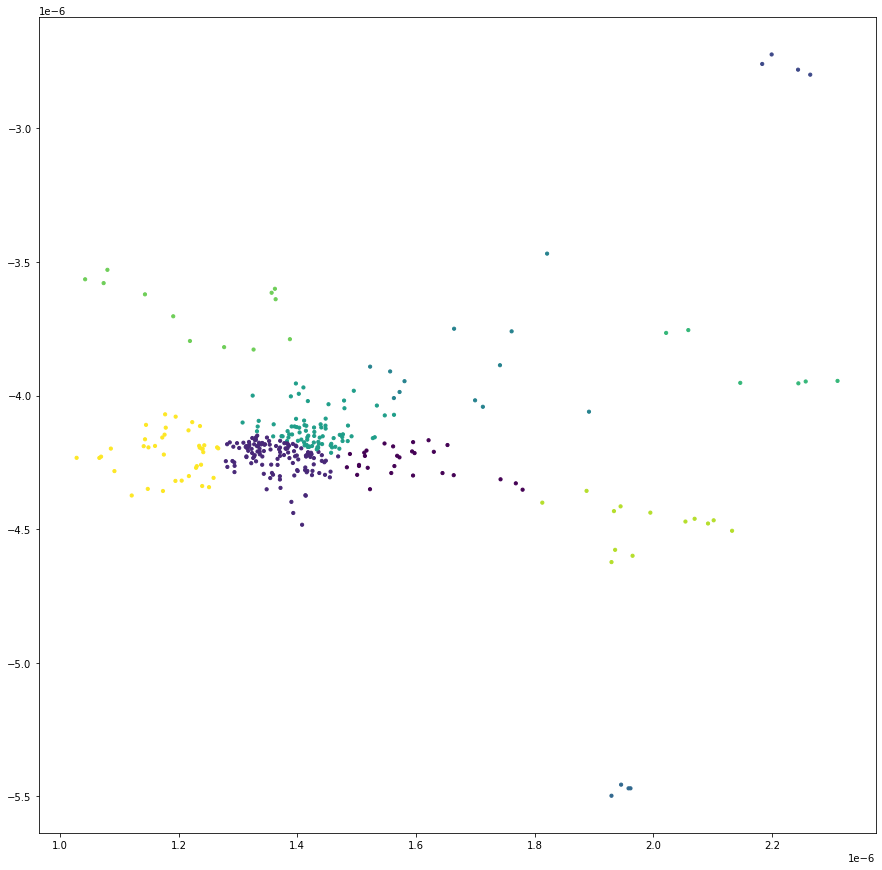

In [48]:
plt.figure(figsize=(15,15))
plt.scatter(tsne[:, 0], tsne[:, 1], s=10, c=tag)
plt.show()

In [49]:
import numpy as np
clusters = dict()
word_np = np.array(word)
for i in range(10):
  cluster = word_np[tag==i]
  clusters[i] = cluster

In [50]:
clusters

{0: array(['지난해', '목표', '가다', '공', '미국', '현재', '일본', '시간', '논문', '표면', '지금',
        '중국', '참여', '위해', '위', '뒤', '내다', '지난', '수준', '발표', '정확도', '은',
        '오다', '선', '우주선', '예정', '성공하다', '늘다'], dtype='<U7'),
 1: array(['조절', '이렇다', '의하다', '이르다', '박사', '시키다', '그러나', '비행', '볼', '자연',
        '한국', '고', '기계', '중', '달리', '한다는', '이번', '신호', '응용', '제', '개발',
        '적용', '일어나다', '테이저', '폐암', '도', '환경', '드론', '이용', '인류', '다', '전기',
        '않다', '하지만', '수', '점', '성과', '태양', '기술', '연구원', '구현', '뿐', '실험',
        '변화', '하나', '진단', '가능하다', '전문가', '접다', '구글', '지원', '기초과학', '나노',
        '신', '치매', '없이', '형태', '존재', '필요하다', '스마트폰', '인식', '물', '못', '최근',
        '시스템', '전자', '문제', '때문', '더', '연구', '같다', '인공', '달이', '방식', '수행',
        '음성인식', '모든', '지구', '어렵다', '기존', '전지', '나타나다', '현상', '데', '이뤄지다',
        '과정', '서울대', '과학', '발전', '슈퍼컴퓨터', '명', '찾다', '안', '말', '도구', '치료',
        '나오다', '지적', '만들다', '분야', '보이다', '기대', '이미지', '아니다', '크다', '다양하다',
        '거리', '달', '발현', '쉬다', '기능', '음', '과', '발

# 5번

t-SNE에는 perplexity라는 hyperparameter가 존재했는데요. 5~50 사이의 값에서 robust 한 결과를 보인다고는 하지만 perplexity가 달라지면서 embedding 결과가 미묘하지만 크게 바뀌기도 합니다. perplexity와 n_iter 조합을 달리해보면서 perplexity의 변화가 embedding결과에 어떤 영향을 미치는지 살펴보세요!

\>> perplexity가 작아지면서 점들은 더 퍼지게 된다.

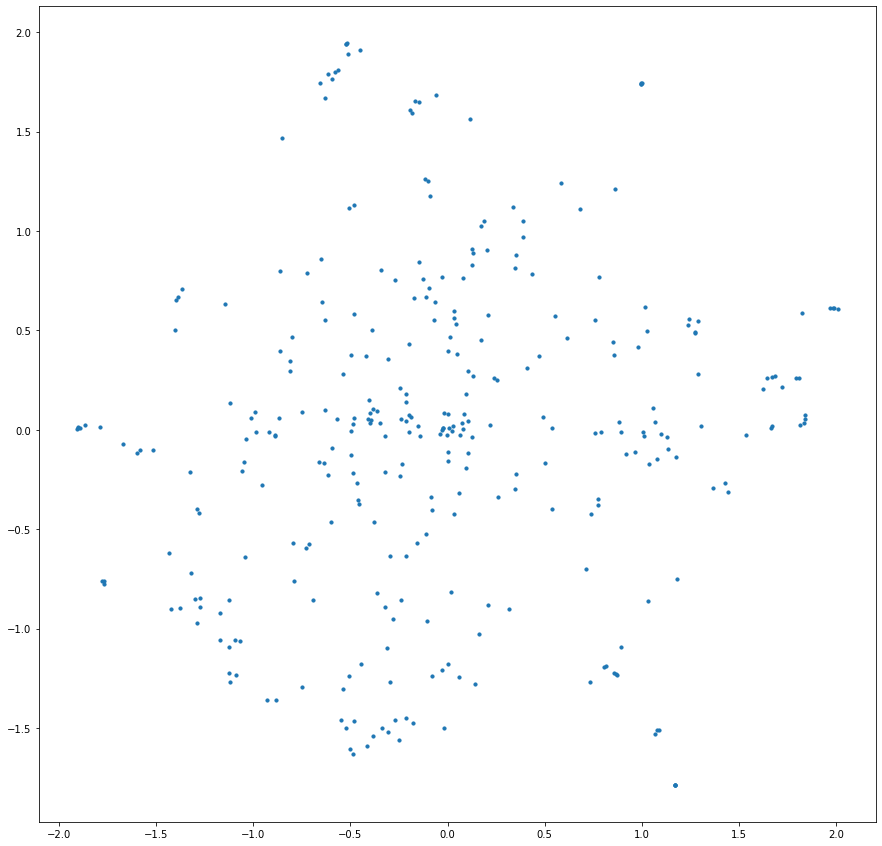

In [51]:
# t-SNE
tsne = TSNE(n_components = 2, random_state = 123, perplexity = 5, learning_rate = 0.01, init = 'random', n_iter = 800).fit_transform(vector)

# 시각화
plt.figure(figsize=(15,15))
plt.scatter(tsne[:, 0], tsne[:, 1], s=10)
plt.show()


# 수고하셨습니다!